# TP 1 : Génération et étude d’un signal numérique : le cosinus

## 2.1 Représentation temporelle

Un signal numérique, $x$, est représenté sous Matlab par un tableau contenant un nombre fini, $N$, de valeurs représentant des échantillons de signal prélevés toutes les $T_{e}$ secondes (échantillonnage uniforme) $:[x(0) x(1) \ldots x(N-1)],$ le $k^{\text {ième }}$ élément $x(k)$ représentant en réalité $x\left(k T_{e}\right)$.
1. Générer 90 échantillons d'un cosinus (fonction cos.m sous matlab), d'amplitude 1 (V), de fréquence $f_{0}=1100 \mathrm{~Hz}$ et échantillonné à $F_{e}=10000 \mathrm{~Hz}$.
2. En utilisant la fonction plot.m de Matlab, tracer le cosinus généré précédemment avec une échelle temporelle en secondes. On doit pouvoir retrouver, à partir du tracé, la fréquence et l'amplitude du cosinus. Pensez à ajouter des labels sur vos axes en utilisant les fonctions xlabel.m et ylabel.m de Matlab
3. Générer 90 échantillons d'un cosinus (fonction cos.m sous matlab), d'amplitude 1 (V), de fréquence $f_{0}=1100 \mathrm{~Hz}$ et échantillonné à $F_{e}=1000 \mathrm{~Hz}$.
4. En utilisant la fonction plot.m de Matlab, tracer le cosinus généré précédemment avec une échelle temporelle en secondes. La fréquence mesurée sur le cosinus tracé n'est pas $f_{0}=1100 \mathrm{~Hz}$. Vous devez être capables d'expliquer pourquoi et d'où vient la valeur de la fréquence observée.

In [1]:
A1 = 1; %Amplitude 1
A2 = 2; %Amplitude 2
f1 = 1000; %Frequence 1
f2 = 3000; %Frequence 2
Fe = 10000;
T1 = 1/f1; %Periode 1
T2 = 1/f2; %Periode 2
Te = 1/Fe;
N = 100; %Nombre d'echantillon

temps  = [0:Te:(N-1)*Te];
x1 = A1*cos(2*pi*f1*temps);
x2 = A2*cos(2*pi*f2*temps);
x = x1+x2;

In [8]:
fc = 2000; %Frequence de coupure entre les deux cosinus.
fcn = fc/Fe; %Frequence de coupure normalisé

In [17]:
ordre1 = 11; %2N+1
ensemble_n1 = [-(ordre1-1)/2*Te:Te:(ordre1-1)/2*Te];
h1 = 2*fcn*sinc(2*fc*ensemble_n1);
length(h1);

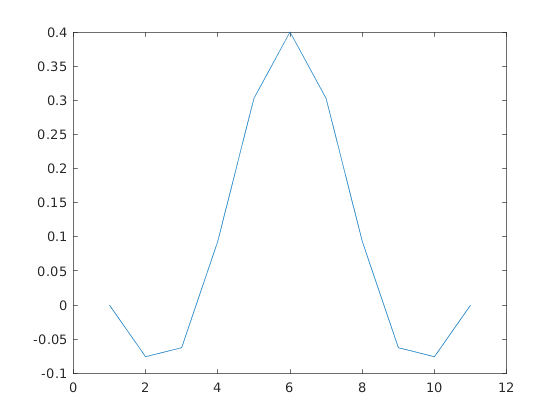

In [23]:
figure(1)
plot(h1)

In [24]:
ordre2 = 62; %2N+1
ensemble_n2 = [-(ordre2-1)/2*Te:Te:(ordre2-1)/2*Te];
h2 = 2*fcn*sinc(2*fc*ensemble_n2);
length(h2);

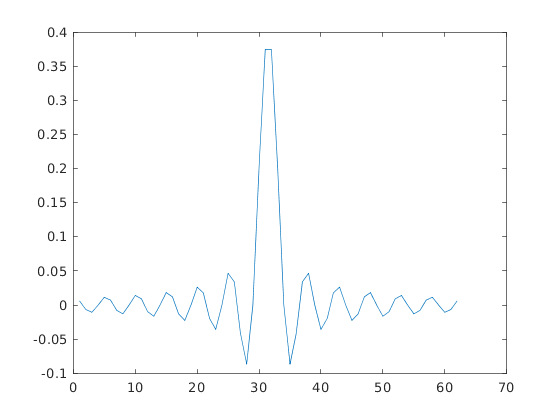

In [25]:
figure(2)
plot(h2)

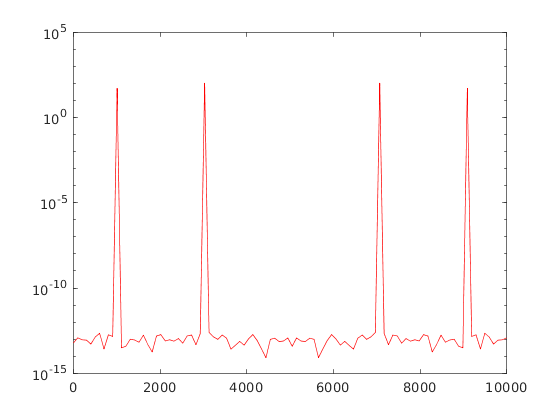

In [31]:
%Avec Fourier Discret
X = fft(x, length(x));
H1 = fft(h1, length(x));
H2 = fft(h2, length(x));
figure(4);
semilogy(linspace(0, Fe, length(H1)), abs(H1), "b")
semilogy(linspace(0, Fe, length(H2)), abs(H2), "g")
semilogy(linspace(0, Fe, length(H2)), abs(X), "r")

In [33]:
%Filtrage
y1 = filter(h1, 1, x);
y2 = filter(h2, 1, x);